<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/Clothing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clothing Classification**

**By: Loai Nazeer**

**Import dependenicies**

In [2]:
!pip -q install tensorflow_datasets
print("Done Installing")

Done Installing


In [3]:
#Import dependenicies
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging

# Donwload the dataset (Fashion MNIST)

In [4]:
#import the dataset which is Fashion MNIST

dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_data , test_data = dataset['train'],dataset['test']

The images are 28  28 arrays, with pixel values in the range [0, 255]. The labels are an array of integers, in the range [0, 9]. These correspond to the class of clothing the image represents:
_______________
| Label |	Class |
| --- | --- |
| 0 |	T-shirt/top |
|  |  |
| 1	| Trouser |
|  |  |
| 2 |	Pullover |
|  |  |
| 3	| Dress |
|  |  |
| 4	| Coat |
|  |  |
| 5	| Sandal |
|  |  |
| 6	| Shirt |
|  |  |
| 7	| Sneaker |
|  |  |
| 8	| Bag |
|  |  |
| 9	| Ankle boot |

In [5]:
class_name = metadata.features['label'].names
print("Class names : ",class_name)

Class names :  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Explore the data

In [6]:
num_train =  metadata.splits['train'].num_examples
num_test =  metadata.splits['test'].num_examples
print("Count of the train dataset is : ",num_train)
print("Count of the test dataset is : ",num_test)

Count of the train dataset is :  60000
Count of the test dataset is :  10000


# Preprocessing the data

In [7]:
#Normlize the data
def norm (images,labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images,labels

In [8]:
from re import T
#Apply the norm function on tarin and test data

train_data = train_data.map(norm)
test_data = test_data.map(norm)

#cash the dataset
train_data = train_data.cache()
test_data = test_data.cache()

In [9]:
train_data.element_spec[0]

TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None)

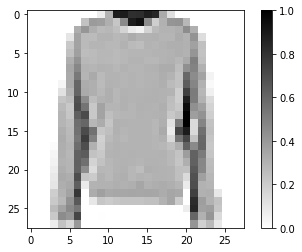

In [10]:
#plot one image of the data
for image, label in train_data.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

# Bulid the Model

In [11]:
l0 = tf.keras.layers.Flatten(input_shape=(28,28,1))
l1 = tf.keras.layers.Dense(128,activation=tf.nn.relu)
l11 = tf.keras.layers.Dense(256,activation=tf.nn.relu)
l2 = tf.keras.layers.Dense(10,activation=tf.nn.softmax)
model = tf.keras.Sequential([l0,l1,l11,l2])

# Compile the model

In [12]:
from tensorflow.python.eager.monitoring import Metric
from tensorflow.python.ops.nn_impl import log_poisson_loss
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

# Train the model
First, we define the iteration behavior for the train dataset:

Repeat forever by specifying dataset.repeat() (the epochs parameter described below limits how long we perform training).
The dataset.shuffle(60000) randomizes the order so our model cannot learn anything from the order of the examples.
And dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating the model variables.
Training is performed by calling the model.fit method:

Feed the training data to the model using train_dataset.
The model learns to associate images and labels.
The epochs=5 parameter limits training to 5 full iterations of the training dataset, so a total of 5 * 60000 = 300000 examples.

In [13]:
BATCH_SIZE = 20
train_data = train_data.cache().repeat().shuffle(num_train).batch(BATCH_SIZE)
test_data = test_data.cache().batch(BATCH_SIZE)

In [14]:
model.fit(train_data, epochs=5, steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

Epoch 1/5
3000/3000 [==============================] - 22s 3ms/step - loss: 0.4720 - accuracy: 0.8285
Epoch 2/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3615 - accuracy: 0.8668
Epoch 3/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3210 - accuracy: 0.8815
Epoch 4/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2994 - accuracy: 0.8892
Epoch 5/5
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2797 - accuracy: 0.8936


# Evaluate the model

In [15]:
test_loss , test_acuracy = model.evaluate(test_data,steps=math.ceil(num_test/32))
print('Accuracy on test dataset : ',test_acuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3476 - accuracy: 0.8780
Accuracy on test dataset :  0.8779552578926086


# Make a predictions

In [16]:
for test_image,test_label in test_data.take(1):
  test_image = test_image.numpy()
  test_label = test_label.numpy()
  predicates = model.predict(test_image)

In [17]:
predicates.shape

(20, 10)

In [18]:
predicates[0]

array([7.7151717e-06, 3.1846410e-09, 2.7928555e-03, 1.7559782e-06,
       9.5058429e-01, 9.3618668e-11, 4.6612415e-02, 3.3214112e-11,
       8.5381049e-07, 7.5333046e-09], dtype=float32)

In [19]:
np.argmax(predicates[0])

4

In [20]:
test_label[0]

4

In [21]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

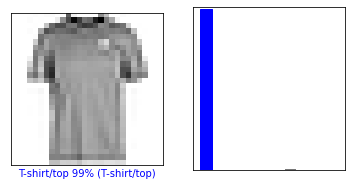

In [22]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicates, test_label, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predicates, test_label)

In [23]:
img = test_image[0]
print(img.shape)

(28, 28, 1)


In [24]:
# make a predication for one image so we need to put it ii a list 
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [25]:
pred_one = model.predict(img)
print(pred_one)

[[7.7151717e-06 3.1846410e-09 2.7928555e-03 1.7559798e-06 9.5058429e-01
  9.3618849e-11 4.6612393e-02 3.3214112e-11 8.5381049e-07 7.5333046e-09]]


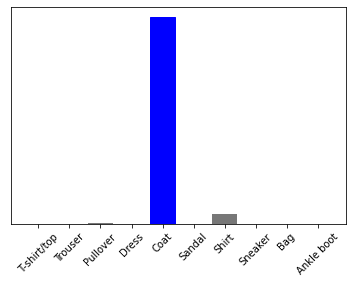

In [26]:
plot_value_array(0, pred_one, test_label)
_ = plt.xticks(range(10), class_name, rotation=45)

In [27]:
np.argmax(pred_one[0])

4